In this notebook, i will try to take insights from a dataset that contain data about startups categorized in the united states and whether they later succeded/acquired by other companies or closed

In [ ]:
# Import needed libraries to evaluate machine learning models, dealing with datasets and preprocessing data
import pandas as pd
import sklearn.metrics
import sklearn.preprocessing
import sklearn.model_selection

In [ ]:
# upload the dataset and show all the columns
pd.set_option('display.max_columns', None)
df = pd.read_csv("startup data.csv")
df.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.00,1,acquired


In [ ]:
# see how many rows and columns i have
df.shape

(923, 49)

In [ ]:
# see what are the nan values we have, and see what to delete from them
Nan = df.isnull().sum()
Nan
# i will try to fill the gorst anm d,ast milestones year and closed at dates
# because the values are nan because there no milesotnes to begin with
# and the companies that didn't close actually succeded and got acquired

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [ ]:
# i will check the unique values in the unnamed6 column to see if the column is important or deletable
Unnamed6_unique = df['Unnamed: 6'].unique().tolist()
Unnamed6_unique

[nan,
 'San Diego CA 92121',
 'Cupertino CA 95014',
 'San Francisco CA 94105',
 'Mountain View CA 94043',
 'Williamstown MA 1267',
 'Vienna VA 22182',
 'New York NY 10004',
 'Chicago IL 60601',
 'Berkeley CA 94704',
 'Santa Ana CA 92705',
 'Moffett Field CA 94035',
 'Seattle WA 98119',
 'Pittsburgh PA 15219',
 'New York NY 10011',
 'San Jose CA 95134',
 'Manchester NH 3101',
 'Sunnyvale CA 94085',
 'New York NY 100011',
 'Cambridge MA 2139',
 'San Francisco CA 94607',
 'South San Francisco CA 94080',
 'Boston MA 2210',
 'Austin TX 78731',
 'Waltham MA 2451',
 'Palo Alto CA 94301',
 'Palo Alto CA 95128',
 'Wilmington MA 1887',
 'Kirkland WA 98033-6314',
 'Tampa FL 33609',
 'Boston MA 02111-1720',
 'Fremont CA 94538',
 'Santa Clara CA 95051',
 'San Francisco CA 94107',
 'Cambridge MA 2138',
 'Princeton NJ 8540',
 'Loveland CO 80538',
 'Kearneysville WV 25430',
 'Mountain View CA 94041',
 'San Francisco CA 94110',
 'Alpharetta GA 30009',
 'Seattle WA 98104',
 'Bellevue WA 98004',
 'San Jo

In [ ]:
# 'unnamed: 6' column have a lot of null data and it's not adding any important information
# so i will delete it now, and so that i won't delete more NAN rows when i delete them later
df = df.drop(['Unnamed: 6'], axis = 1)

In [ ]:
# see if 'state_code' and 'state_code.1' are similar, if so then i will later delete on of them
unique_state_code1 = df['state_code.1'].unique()
unique_statecode = df['state_code'].unique()
print(unique_state_code1)
print(unique_statecode)

# they are the same but state_code.1 have nan value

['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' nan 'AZ' 'ID' 'AR' 'WI']
['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' 'AZ' 'ID' 'AR' 'WI']


In [ ]:
# fill age first and last milestone with zero
# i will see if both values in them have empty values when 'milestones' column is also 0

condition_nomilsteones_nolast = (df['milestones'] == 0) & df['age_last_milestone_year'].isnull()
condition_nomilsteones_nofirst = (df['milestones'] == 0) & df['age_first_milestone_year'].isnull()
print(df[condition_nomilsteones_nolast].shape, df[condition_nomilsteones_nofirst].shape)

(152, 48) (152, 48)


In [ ]:
# since now i saw the number of empty values in both columns is same when number of milestones is zero
# i will fill the missing values with zero
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(0)

In [ ]:
# i will fill missing data in the 'closed at' column, as it might mean the companies didn't close yet
df['closed_at'] = df['closed_at'].fillna('not closed')

In [ ]:
# turning the column that have date values into date format
# so that i can do preprocessing and train the model
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

In [ ]:
# the columns of labels and status might indicate the same thing
# i want to check if the labels and status have simialr values for all rows
# then i will delete one of them and  keep the other
label1_statusacquired = (df['labels'] == 1) & (df['status'] == 'acquired')
label0_statusclosed = (df['labels'] == 0) & (df['status'] == 'closed')

In [ ]:
# if the number of rows with vlaue 1 for label and acquired for status are the same
# and if the number of rows with vlaue 0 for label and closed for status are the same
# then they resemble the same thing, and i cna delete the label column
print('rows where label is 1 and status is acquired', df[label1_statusacquired].shape)
print('rows where label is 0 and status is closed', df[label0_statusclosed].shape)
print('The count of values of label column is 1:',df['labels'].value_counts()[1])
print('The count of values of label column is 0:',df['labels'].value_counts()[0])
print('The value count of status label is acquired', df['status'].value_counts()['acquired'], 'The value cont of status label is closed', df['status'].value_counts()['closed'])

rows where label is 1 and status is acquired (597, 48)
rows where label is 0 and status is closed (326, 48)
The count of values of label column is 1: 597
The count of values of label column is 0: 326
The value count of status label is acquired 597 The value cont of status label is closed 326


In [ ]:
# then i will check if all project that have 'not closed' as a value in the 'closed at' column
# are also acquired, if the number are same or less then this is true
notclosed_acquired = (df['closed_at'] == 'not closed') & (df['status'] == 'acquired')
notclosed_acquired_count = df[notclosed_acquired]
# see any raw with 'not closed' value isn't a company that was acquired or succed
notclosed_notacquired = (df['closed_at'] == 'not closed') & (df['status'] != 'acquired')
notclosed_notacquired_count = df[notclosed_notacquired]
print('count of companies not closed and acquired', notclosed_acquired_count.shape)
print('count of companies not closed and not acquired', notclosed_notacquired_count.shape)

# 588 is less than 597 and the not acquired comanies are 0 which show that this companies succeded.

count of companies not closed and acquired (588, 48)
count of companies not closed and not acquired (0, 48)


In [ ]:
# check if any rows are duplicated, to then delete the duplicate onews
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

#Exploratory stage
Here i will discover the dataset and check for insights in the dataset.

In [ ]:
# seeing what is the type of companies and how much are they repeated
print(df.value_counts(['category_code']))

# and in the counts, we can see that web and software startups are by far the biggest in number
# then come mobile , and the lowest are mostly about finance, sport, services and medicine
# IT field have the biggest opprtunites to creat new things

category_code   
software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
network_hosting      34
biotech              34
hardware             27
public_relations     25
ecommerce            25
cleantech            23
security             19
analytics            19
social               14
search               12
other                11
messaging            11
news                  8
fashion               8
travel                8
medical               7
photo_video           7
music                 6
finance               6
education             4
real_estate           3
health                3
consulting            3
manufacturing         2
automotive            2
transportation        2
hospitality           1
sports                1
dtype: int64


In [ ]:
# see the count states, where most startups are located
print(df.value_counts(['state_code']))

# i the result we can see that California have far more startups that other states
# and it's probably because of entrepreuners friendly policies
# and we can advise the other states with lowest startups to implment better policies

state_code
CA            488
NY            106
MA             83
WA             42
TX             42
CO             19
IL             18
PA             17
VA             13
GA             11
NJ              7
MD              7
OR              7
NC              7
FL              6
OH              6
MN              5
DC              4
CT              4
MI              3
TN              3
RI              3
UT              3
NV              2
NH              2
AZ              2
ME              2
KY              2
IN              2
MO              2
WI              1
AR              1
NM              1
ID              1
WV              1
dtype: int64


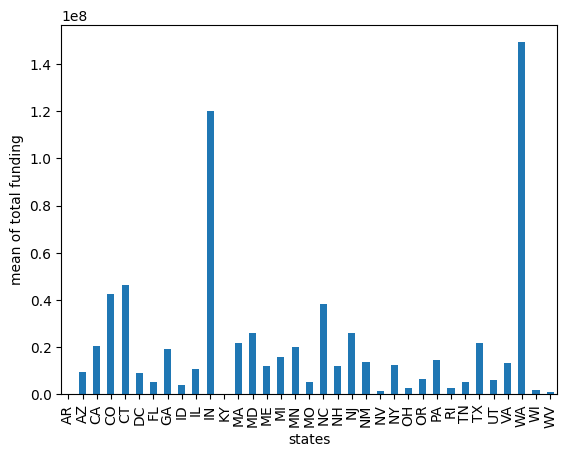

In [ ]:
# what the average funding each state get for startups

# first i will import needed libraries
import matplotlib.pyplot as plt

mean_state_funding = df.groupby('state_code')['funding_total_usd'].mean()
mean_state_funding.plot(kind='bar')
plt.xlabel('states')
plt.ylabel('mean of total funding')
plt.show()

# it's surprising to California with relatively low funding for one startup, and we see Minneosta with highest funding
# thic can proves that finance don't play the biggest role in maing a startup

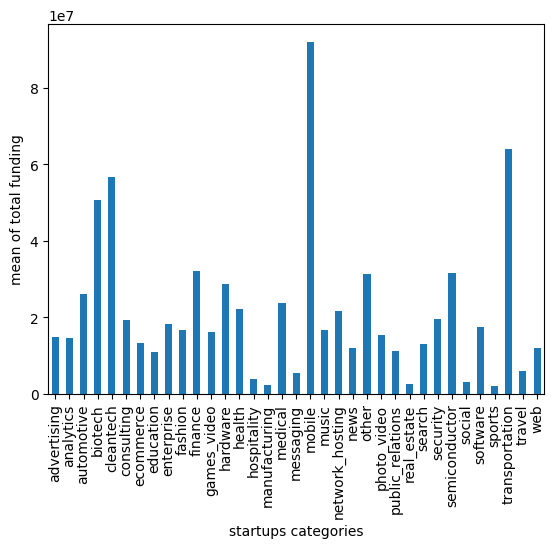

In [ ]:
# mean funding of startups in each category
Category_funded = df.groupby('category_code')['funding_total_usd'].mean()
Category_funded.plot(kind='bar')
plt.xlabel('startups categories')
plt.ylabel('mean of total funding')
plt.show()

# this list alongside the count of each startup type
# help us to predict cheapest the statrtup to start
# and it seems mobile startups are the most expensive to start a project with them

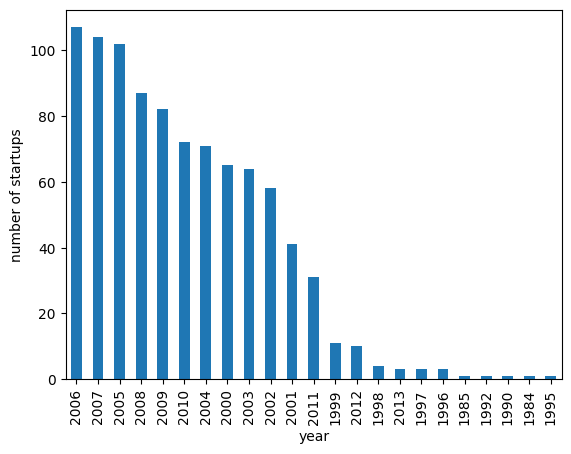

In [ ]:
# see how many satrtups started by year
startups_founed_peryear = df['founded_at'].dt.year.value_counts()
startups_founed_peryear.plot(kind='bar')
plt.xlabel('year')
plt.ylabel('number of startups')
plt.show()

# we can see the years with most and least startups
# it seems from 2005 to 2009 was partcular good (or even from 2000 to 2011)
# pretty intersting because back then (from 2007 to 2009) the world had financial crisis
# so it's possible these startups also failed

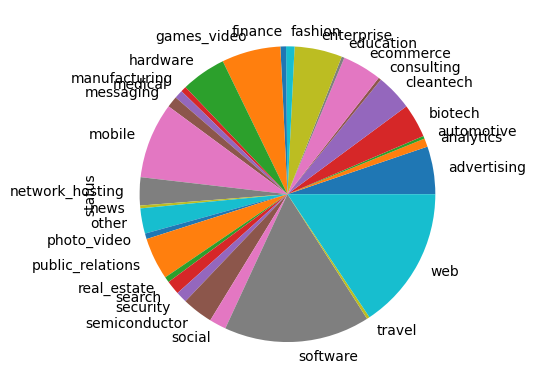

In [ ]:
# i will make pie charts of closed and acqiured companies based on their category
closed_bytype = df[df['status'] == 'closed'].groupby(df['category_code'])['status'].count()
closed_bytype.plot(kind='pie')
plt.show()

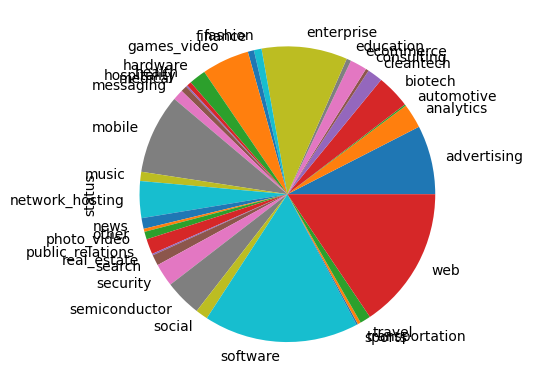

In [ ]:
acquired_bytype = df[df['status'] == 'acquired'].groupby(df['category_code'])['status'].count()
acquired_bytype.plot(kind='pie')
plt.show()
# and this can help us to see in what categories startups have better chance to succed or fail

In [ ]:
# since the pir charts aren't totally clear, i will creat a dataset
# where next to each category we can see the number sof succsful and closed startups
# closed vlaues in the middle and opened in the right
compareclosedacquired = pd.concat([closed_bytype,acquired_bytype], axis=1)
compareclosedacquired

,status,status
category_code,,
advertising,17.0,45.0
analytics,3.0,16.0
automotive,1.0,1.0
biotech,12.0,22.0
cleantech,13.0,10.0
consulting,1.0,2.0
ecommerce,14.0,11.0
education,1.0,3.0
enterprise,17.0,56.0


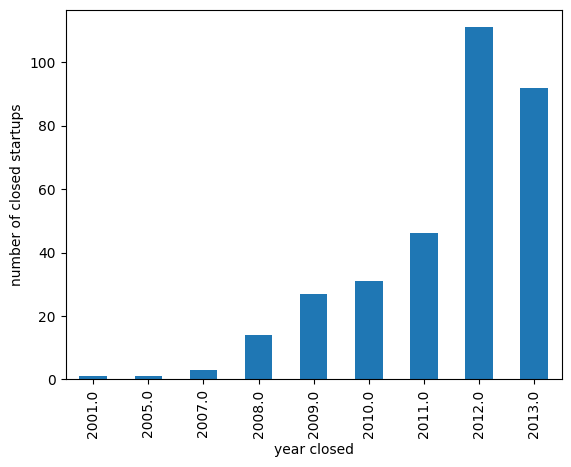

In [ ]:
# see how many startups were closed at each year

# first i must remove the 'not closed' values in 'closed_at' column
# i don't want to edit the original dataset
# i will create a varaible that replace the 'not closed' values with nan
df2 =df['closed_at'].replace('not closed', None)
# drop the closed_at column from the original datsaet because it will be replaced by df2
df3 = df.drop(['closed_at'], axis=1)
# add the 'closed_at' column that have nan values instead of 'not closed'
df4 = pd.concat([df3, df2], axis = 1)
# and then find number of closed startups in each year, first i must turn the 'close_at' column to date sahpe data
df4['closed_at'] = pd.to_datetime(df4['closed_at'])
closed_byyear = df4[df4['status'] == 'closed'].groupby(df4['closed_at'].dt.year)['status'].count()
closed_byyear.plot(kind='bar')
plt.xlabel('year closed')
plt.ylabel('number of closed startups')
plt.show()
# years 2013 and 2012 had the most close outs

# Building the machine learning model

In [ ]:
# i will delete the columns that don't provide needed data for building the machine learning model
# i will delete the 'unnamed:0', 'closed_at', as it doesn't effect the result
df = df.drop(['Unnamed: 0', 'latitude', 'longitude', 'state_code.1', 'zip_code', 'closed_at', 'id', 'name', 'object_id', 'labels'], axis = 1)
df.head(3)

,state_code,city,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,acquired
1,CA,Los Gatos,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,acquired
2,CA,San Diego,2009-03-18,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1,acquired


In [ ]:
# turn status values to 1 and 0
df['status'] = df['status'].replace({'acquired' : 1, 'closed' : 0})

In [ ]:
# turn the date values to years nly so that i can later easily encode them
df['first_funding_at'] = df['first_funding_at'].dt.year
df['last_funding_at'] = df['last_funding_at'].dt.year
df['founded_at'] = df['founded_at'].dt.year
# turning them ti string type values to use count encoders on them
df['first_funding_at'] = df['first_funding_at'].astype(str)
df['last_funding_at'] = df['last_funding_at'].astype(str)
df['founded_at'] = df['founded_at'].astype(str)
df.head(3)

,state_code,city,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,2007,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,1
1,CA,Los Gatos,2000,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,1
2,CA,San Diego,2009,2010,2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1,1


In [ ]:
# download category encoders to use count encoder
!pip install category_encoders

In [ ]:
# using the count encoder
import category_encoders as ce
countencoder = ce.CountEncoder()
encodingcategoricalvalues = countencoder.fit_transform(df[['state_code','city','category_code', 'first_funding_at', 'last_funding_at', 'founded_at']])
df = df.drop(['state_code','city','category_code','first_funding_at', 'last_funding_at', 'founded_at'], axis = 1)

In [ ]:
# adding the encoded values to the dataset
df = pd.concat([df,encodingcategoricalvalues], axis=1)
df.head(3)

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,state_code,city,category_code,first_funding_at,last_funding_at,founded_at
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,1,488,15,6,88,175,104
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,1,488,3,73,148,116,65
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1,1,488,15,144,115,175,82


In [ ]:
# split the data to train and test sets
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.15)
print("number of rows and columns of the train and test sets:", df_train.shape, df_test.shape)

number of rows and columns of the train and test sets: (784, 38) (139, 38)


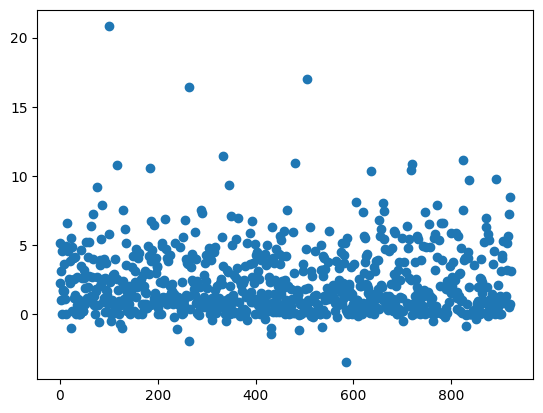

In [ ]:
# i will use scatter plot to find outlier values and then remove them
# i will only remove values that are very far because the dataset isn't very big
plt.scatter(df_train.index, df_train['age_first_funding_year'])
plt.show()

In [ ]:
df_train = df_train[df_train['age_first_funding_year'] < 20]
df_train.shape

(783, 38)

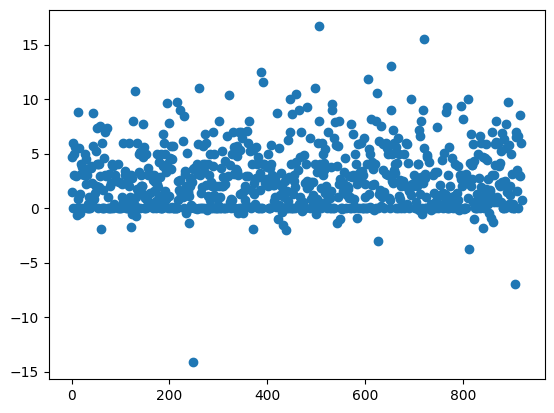

In [ ]:
plt.scatter(df_train.index, df_train['age_first_milestone_year'])
plt.show()

In [ ]:
df_train = df_train[df_train['age_first_milestone_year'] > -10]
df_train = df_train[df_train['age_first_milestone_year'] < 15]
df_train.shape

(780, 38)

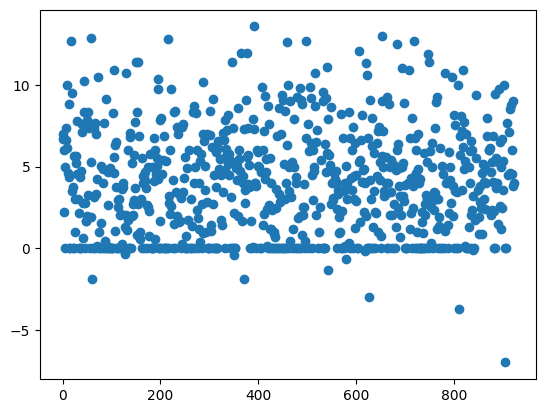

In [ ]:
plt.scatter(df_train.index, df_train['age_last_milestone_year'])
plt.show()

In [ ]:
df_train = df_train[df_train['age_last_milestone_year'] > -5]
df_train.shape

(779, 38)

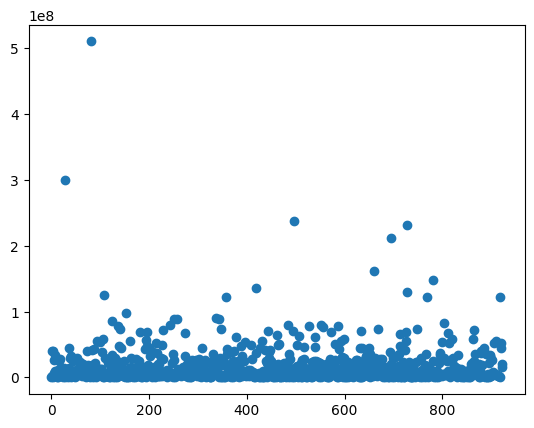

In [ ]:
plt.scatter(df_train.index, df_train['funding_total_usd'])
plt.show()

In [ ]:
# see the exact max calue to delete it
df_train['funding_total_usd'].max()

510000000

In [ ]:
df_train = df_train[df_train['funding_total_usd'] < 510000000]
df_train.shape

(778, 38)

In [ ]:
# seperate the target column to start bukding the model and test it
x_train = df_train.drop(["status"], axis = 1)
y_train = df_train["status"]

x_test = df_test.drop(["status"], axis = 1)
y_test = df_test["status"]

print("x train size:", x_train.shape)
print("x test size:", x_test.shape)
print("y train size:", y_train.shape)
print("y test size:", y_test.shape)

x train size: (778, 37)
x test size: (139, 37)
y train size: (778,)
y test size: (139,)


And here i will build the machine leanrig model, and
I wil not use complicated nerual network methods as i see the dataste is small and complicated models might not add any more accurate results

In [ ]:
# here i will import needed libraireis for grid search (which helps in trying several hyperparameters)
# and libraires needed to use randomforestclassifer
# i picked random forest classifer because it's complicated but without diving into neural network area
# but also have a lot of hyperparmeter to try differnet tunings

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# here i am will pick different estimators (number of trees), different max depths of the tree
# and both available criterions, make several values for the leaf nodes, and try severla impurity values when splitting nodes
# this code can take time
parameters = {'n_estimators' : [10, 75, 150, 200, 100, 20, 50], 'criterion' : ['gini', 'entropy'],
              'max_depth' : [3,5,10,20,30,None],  'max_leaf_nodes' : [10,30, None], 'min_impurity_decrease' : [1, 0.5, 0.2, 0.1, 0.0]}

rfcmodel = sklearn.model_selection.GridSearchCV(RandomForestClassifier(),parameters, cv=3, scoring='accuracy',n_jobs = -1 )
rfcmodel.fit(x_train, y_train)

y_predicted = rfcmodel.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
precision, recall, f1, support= sklearn.metrics.precision_recall_fscore_support(y_test, y_predicted)
CM = sklearn.metrics.confusion_matrix(y_test, y_predicted)
print(accuracy, precision, recall, f1, CM)

0.8489208633093526 [0.83783784 0.85294118] [0.67391304 0.93548387] [0.74698795 0.89230769] [[31 15]
 [ 6 87]]


# Discussing Results

the accruacy of the model is: 0.8489208633093526

the precision is the correctly predicted positive instances to the number of total times the model predicted a positive value (tp / (tp + fp)), and here it is: [0.83783784, 0.85294118]

the recall is what is the percentage of instances were the model predicted positive valus correctly out of all the positive values (tp / (tp + fn)), and it is: [0.67391304, 0.93548387]

the f1 score is like a mean of precision and recall, and it is: [0.74698795, 0.89230769]

The accuracy is pretty good for people who want to know if it's good to invest in a certain startup, recall and f1 shows us the model is also better at predicting startups that will close and not succeed, recall show us that the model can predict more than half of the startups that will succeed, but not as good as the accuracy percentage.

And there is also the confusion matrix, that shows how many times each class (acquired and closed) were predicted correct or false.
The model can almost always predict the startups that will fail, cna predict most of the startups that will succeed, but almost a thrid will be predicted as not succeeding, this might make the model good for picking the best and the startups that will most certianly succeed, which can make the model safe for investors who are thinking in investin in startups.

we can also some of the information and insights we got earlier, to help us in the predition, for example seeing how many satrtuos failed or succeded in each category.

Refencing:
KC.M,(2020),Startup Success Prediction, Kaggle. Available at: https://www.kaggle.com/datasets/manishkc06/startup-success-prediction/data (Accessed: December 16, 2023).